# Homework 2: U.S. Boundary Currents

Name: 

Date: 

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [1]:
# import modules here
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [2]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
evel = xr.open_dataset('/Users/surjitsingh/Desktop/CS185C/Homework_2/EVEL_2015_12.nc')
nvel = xr.open_dataset('/Users/surjitsingh/Desktop/CS185C/Homework_2/NVEL_2015_12.nc')

In [3]:
# store the velocity components and longitude/latitude data
# into numpy arrays
u_vel = evel['EVEL'].isel(time=0, k=0).values
v_vel = nvel['NVEL'].isel(time=0, k=0).values

lon = evel['longitude'].values
lat = evel['latitude'].values

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

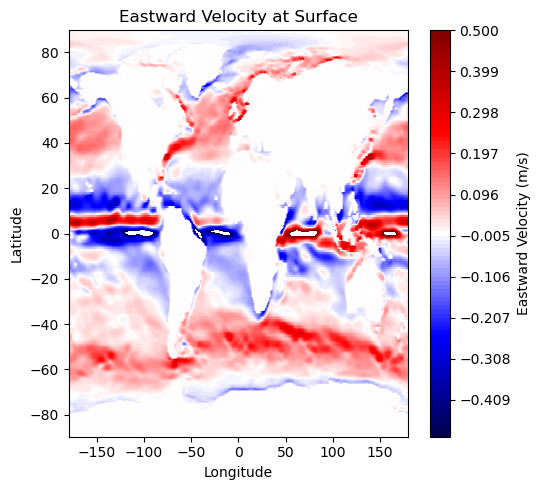

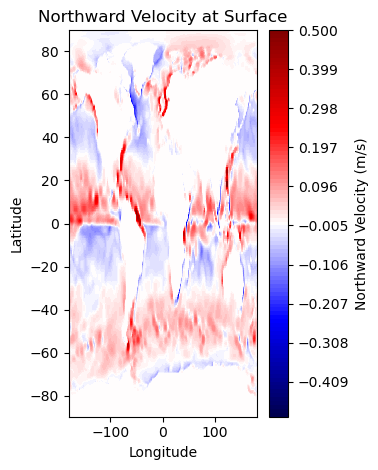

In [4]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1


# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
plt.contourf(lon, lat, u_vel, cmap='seismic', levels=np.linspace(-0.5, 0.5, 100))
plt.colorbar(label='Eastward Velocity (m/s)')
plt.title('Eastward Velocity at Surface')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
plt.contourf(lon, lat, v_vel, cmap='seismic', levels=np.linspace(-0.5, 0.5, 100))
plt.colorbar(label='Northward Velocity (m/s)')
plt.title('Northward Velocity at Surface')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

# change this cell to a markdown and input your response here

1)  It goes 30N on the east coast of US towards the north and 30N on the west coast of US towards the south.
   The currents also move 45N on the east coast of US towards the east and also 45N on the east coast of US north.

2) The Gulf Stream on the east coast is faster.

3)The Gulf Stream is part of the North Atlantic gyre, 
and carries the warm water from the equator aiding the gyre’s clockwise circulation.The
path this warm water follows is along the east coast and then eastward across 
the North Atlantic

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [5]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
theta = xr.open_dataset('/Users/surjitsingh/Desktop/CS185C/Homework_2/THETA_2015_12.nc')

In [6]:
# store the THETA grid into a into numpy array
temp_surface = theta['THETA'].isel(time=0, k=0).values
lon = theta['longitude'].values
lat = theta['latitude'].values

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

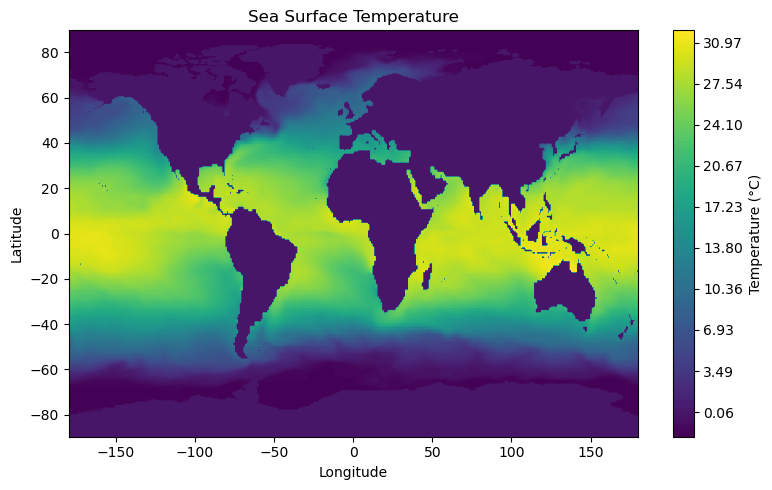

In [7]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
plt.contourf(lon, lat, temp_surface, cmap='viridis', levels=np.linspace(-2, 32, 100))
plt.colorbar(label='Temperature (°C)')
plt.title('Sea Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()



### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

# change this cell to a markdown and input your response here
1)The temp on the east coast is cooler because on the west coast at the same lattitude the current brought by the gulf stream warms up the water.

2)The cold water is brought by the california current north to west while we see the gulf stream carry in the warm water.


### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [8]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook

wvelstar = xr.open_dataset('/Users/surjitsingh/Desktop/CS185C/Homework_2/WVELSTAR_2015_12 (1).nc')

In [9]:
# store the WVELSTAR grid into a into numpy array
vertical_velocity = wvelstar['WVELSTAR'].isel(time=0).values

In [10]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
depth = wvelstar['Zl'].values
theta = xr.open_dataset('/Users/surjitsingh/Desktop/CS185C/Homework_2/THETA_2015_12.nc')
temperature = theta['THETA'].isel(time=0).values
latitude_index = 259


Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

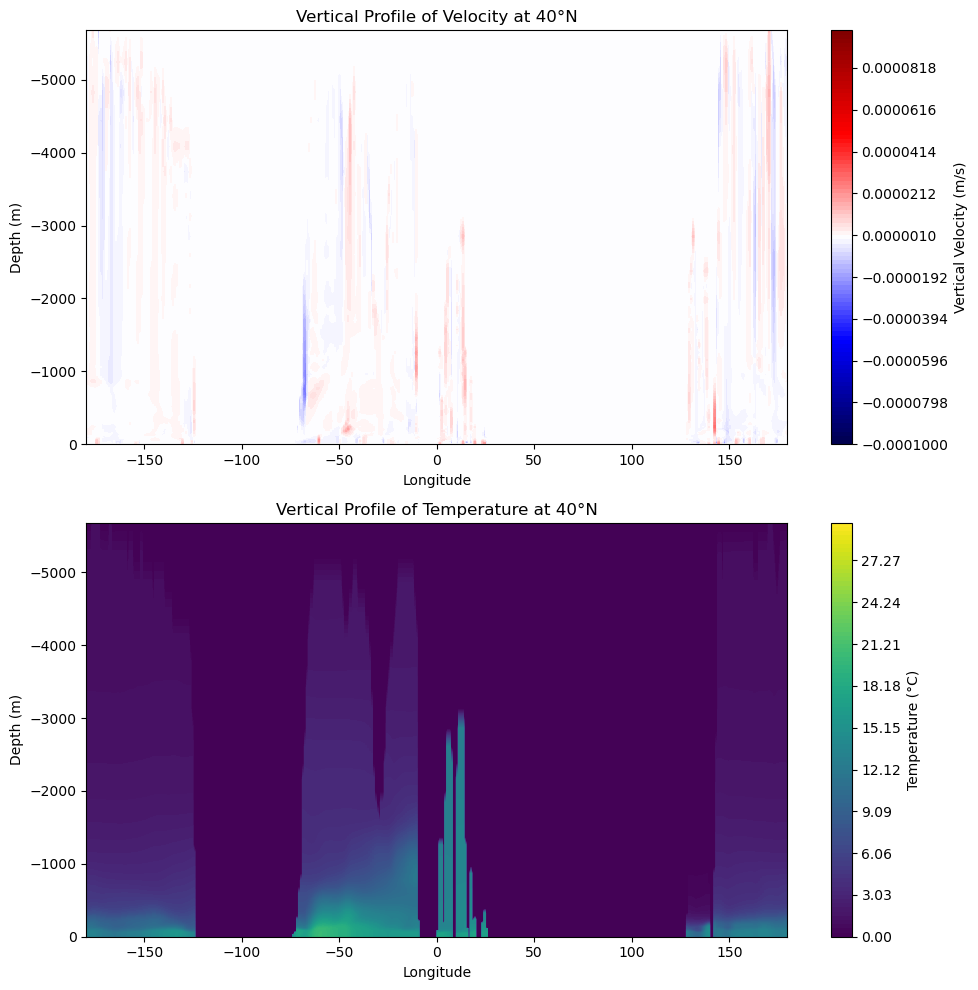

In [11]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot of the vertical velocity
plt.subplot(2,1,1)
plt.contourf(lon, depth, vertical_velocity[:, latitude_index, :], cmap='seismic', levels=np.linspace(-0.0001, 0.0001, 100))
plt.colorbar(label='Vertical Velocity (m/s)')
plt.title('Vertical Profile of Velocity at 40°N')
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
plt.contourf(lon, depth, temperature[:, latitude_index, :], cmap='viridis', levels=np.linspace(0, 30, 100))
plt.colorbar(label='Temperature (°C)')
plt.title('Vertical Profile of Temperature at 40°N')
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


# Questions:
1.How does the vertical velocity in the current on the west coast compare to that on the east?

2.How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?

3.How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?

4.Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the springtime. How might these winds contribute to the vertical velocity identified in question 1?



# change this cell to a markdown and input your response here
1.The west cost vertical velocity is stronger than the east coast because of upwelling.

2.Horizontal velocity is faster than te vertical velocity because vertical motions are more restricted by the ocean while the horizontal velocity has thing that can support it like wing making it faster.

3.They contrirbute to the difference in surface temp differently on which coast its at like for the west its colder and the east its warmer.

4.They contribute  by creating southward winds along the west coast. This cause an incerease in upward vertical velocity because deep water comes up.